In [2]:
import igraph as ig
import utils
import numpy as np
import matplotlib.pyplot as plt

In [3]:
g = ig.Graph.Read('../../data/graphs/april2022.graphml')

In [4]:
VISUAL_STYLE = {
    'layout': utils.layout_geo(g),
    'bbox': (0, 0, 1000, 1000),
}

In [5]:
# Plot adj matrix
# ig.plot(ig.Graph.get_adjacency(g))

# Basic Insights

## Average degree

In [6]:
average_degree = g.ecount() / g.vcount()
average_degree

4.021028037383178

## Degree distribution

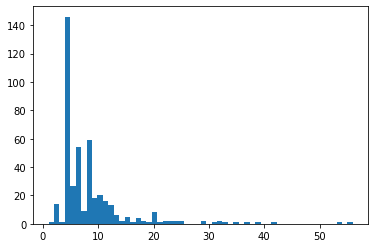

In [7]:
#ig.plot(g.degree_distribution())

bins = len([val for bin1, bin2, val in g.degree_distribution().bins()])
plt.hist(g.degree(), bins)
plt.show()

## Diameter

In [8]:
g.diameter()

26

## Average path lenght/distance

In [9]:
g.average_path_length()
# TODO: Add graph P(d)/d
# ...

9.527041776129963

## Clustering coeff
Grado in cui i vicini di un dato nodo si collegano tra loro ([0-1]):
* 0: nessun collegamento tra i vicini
* 1: i vicini formano un grafo completo

Abbiamo molti nodi con grado basso ma coeff alto (spoke), quindi questi nodi fanno parte di una componente locale di vicinato molto densa, mentre i vicini degli hub sono molto più sparsi (parte bassa a destra).

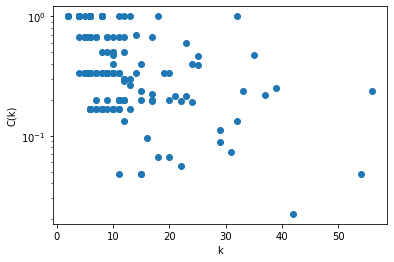

In [10]:
# TODO: Sarebbe più interessante al massimo verificarla per un nodo d'interesse
#g.transitivity_avglocal_undirected()

fig = plt.figure()
ax = plt.gca()
ax.scatter(g.degree(), g.transitivity_local_undirected())
ax.set_xlabel("k")
ax.set_ylabel("C(k)")
ax.set_yscale('log')
# ax.set_xscale('log')

### Articulation points
A vertex is an articulation point if its removal increases the number of connected components in the graph.

In [11]:
# Find the set of articulation points as a vertex sequence
articulation_points = g.vs[g.articulation_points()] # Returns the list of articulation points in the graph
print(g.articulation_points())
g.es["label"] = ""

#ig.plot(g, vertex_size=10,
#    vertex_color="lightblue",
##    # vertex_label=range(g.vcount()),
#    vertex_label=' ',
#    vertex_frame_color = ["red" if v in articulation_points else "black" for v in g.vs],
#    vertex_frame_width = [3 if v in articulation_points else 1 for v in g.vs],
#    edge_width=0.8,
#    edge_color='gray', **VISUAL_STYLE)

[4, 6, 11, 26, 30, 33, 40, 46, 56, 64, 66, 67, 70, 73, 79, 83, 102, 120, 153, 159, 162, 181, 184, 194, 196, 198, 201, 208, 209, 211, 221, 225, 227, 240, 250, 262, 275, 280, 284, 285, 287, 294, 303, 307, 319, 321, 350, 353, 376, 386, 389, 392, 410, 411, 413, 425]


### Bridges
An edge is a bridge if its removal increases the number of (weakly) connected components in the graph.

In [12]:
# Find and color bridges
bridges = g.bridges()   # Returns the list of bridges in the graph
print(bridges)

g.es["color"] = "gray"
g.es[bridges]["color"] = "red"
g.es["width"] = 0.8
g.es[bridges]["width"] = 1.2
g.es["label"] = ""
g.es[bridges]["label"] = "x"

#ig.plot(
#    g,
#    vertex_size=10,
#    vertex_color="lightblue",
#    edge_background="#FFF0",    # transparent background color
#    edge_align_label=True,      # make sure labels are aligned with the edge
#    edge_label=g.es["label"],
#    edge_label_color="red",
#    vertex_label=' ',
#    **VISUAL_STYLE
#)

[1643]


# Network centrality measures

## Centrality

In [13]:
indegree_centrality = np.array(g.degree(g.vs, mode="in-degree"))

vs = {
    **VISUAL_STYLE,
    'vertex_size': 3*np.array(indegree_centrality)+1,
    'vertex_label': ' '
}

print(f'Top 10 vertex by indegree_centrality:')
for i in utils.top_n_indices(indegree_centrality, 10):
    print(f"label: {g.vs[i]['label']}, indegree_centrality: {indegree_centrality[i]}")

# ig.plot(g, vertex_color = 'yellow', **vs)

Top 10 vertex by indegree_centrality:
label: MILANO BOVISA FNM, indegree_centrality: 27
label: MILANO LAMBRATE, indegree_centrality: 27
label: SARONNO, indegree_centrality: 21
label: MILANO PORTA GARIBALDI, indegree_centrality: 21
label: MILANO GRECO PIRELLI, indegree_centrality: 19
label: MONZA, indegree_centrality: 18
label: RHO FIERA, indegree_centrality: 18
label: MILANO DOMODOSSOLA, indegree_centrality: 16
label: MILANO ROGOREDO, indegree_centrality: 15
label: TREVIGLIO, indegree_centrality: 15


/tmp/ipykernel_2522/4255316187.py:1: DeprecationWarning: Partial string matches of enum members are deprecated since igraph 0.9.3; use strings that identify an enum member unambiguously.
  indegree_centrality = np.array(g.degree(g.vs, mode="in-degree"))


In [14]:
outdegree_centrality = np.array(g.degree(g.vs, mode="out-degree"))

vs = {
    **VISUAL_STYLE,
    'vertex_size': 3*np.array(outdegree_centrality)+1,
    'vertex_label': ' ',
    'edge_label': ''
}

print(f'Top 10 vertex by outdegree_centrality:')
for i in utils.top_n_indices(outdegree_centrality, 10):
    print(f"label: {g.vs[i]['label']}, outdegree_centrality: {outdegree_centrality[i]}")

# ig.plot(g, vertex_color = 'green', **vs)

Top 10 vertex by outdegree_centrality:
label: MILANO LAMBRATE, outdegree_centrality: 29
label: MILANO BOVISA FNM, outdegree_centrality: 27
label: SARONNO, outdegree_centrality: 21
label: MONZA, outdegree_centrality: 19
label: MILANO PORTA GARIBALDI, outdegree_centrality: 18
label: GALLARATE, outdegree_centrality: 17
label: MILANO GRECO PIRELLI, outdegree_centrality: 16
label: MILANO DOMODOSSOLA, outdegree_centrality: 16
label: BRESCIA, outdegree_centrality: 16
label: RHO FIERA, outdegree_centrality: 15


/tmp/ipykernel_2522/4019041301.py:1: DeprecationWarning: Partial string matches of enum members are deprecated since igraph 0.9.3; use strings that identify an enum member unambiguously.
  outdegree_centrality = np.array(g.degree(g.vs, mode="out-degree"))


## Betweenness centrality

In [15]:
betweeness = np.array(g.betweenness(directed=True))
norm_btwness = (betweeness - betweeness.min()) / (betweeness.max() - betweeness.min()) 

vs = {
    **VISUAL_STYLE,
    'vertex_size': 50*norm_btwness
}

print(f'Top 10 vertex by betweenness (normalized):')
for i in utils.top_n_indices(norm_btwness, 10):
    print(f"label: {g.vs[i]['label']}, betweeness: {norm_btwness[i]}")

# ig.plot(g, **vs)

Top 10 vertex by betweenness (normalized):
label: MILANO LAMBRATE, betweeness: 1.0
label: MILANO ROGOREDO, betweeness: 0.7819789407295371
label: MONZA, betweeness: 0.7360550047461994
label: MILANO CENTRALE, betweeness: 0.6139560403100263
label: TREVIGLIO, betweeness: 0.516493277038593
label: MILANO PORTA GARIBALDI, betweeness: 0.4907068128585537
label: LECCO, betweeness: 0.48808924493450684
label: MILANO BOVISA FNM, betweeness: 0.46309277251310504
label: RHO FIERA, betweeness: 0.4138710090015089
label: BRESCIA, betweeness: 0.39651522137512785


## Weighted betweenness centrality

In [16]:
w_betweeness = np.array(g.betweenness(directed=True, weights=g.es['num_train']))
norm_w_btwness = (w_betweeness - w_betweeness.min()) / (w_betweeness.max() - w_betweeness.min()) 

vs = {
    **VISUAL_STYLE,
    'vertex_size': 5*w_betweeness
}

print(f"Top 10 vertex by 'num_train' weighted betweenness (normalized):")
for i in utils.top_n_indices(norm_w_btwness, 10):
    print(f"label: {g.vs[i]['label']}, betweeness: {norm_w_btwness[i]}")

#ig.plot(g, **vs)

Top 10 vertex by 'num_train' weighted betweenness (normalized):
label: MILANO LAMBRATE, betweeness: 1.0
label: MILANO PORTA GARIBALDI, betweeness: 0.6513857671829123
label: MILANO ROGOREDO, betweeness: 0.6226129473047339
label: TREVIGLIO, betweeness: 0.4892923954619779
label: MILANO BOVISA FNM, betweeness: 0.3550692288268196
label: LECCO, betweeness: 0.34868793377951934
label: BRESCIA, betweeness: 0.34685490380871986
label: MONZA, betweeness: 0.3338635634426668
label: CALOLZIOCORTE OLGINATE, betweeness: 0.3046961888172561
label: MILANO GRECO PIRELLI, betweeness: 0.2904942337739208


## Pagerank

In [17]:
pr = np.array(g.pagerank(directed=True))

print(f"Top 10 vertex by pagerank:")
for i in utils.top_n_indices(pr, 10):
    print(f"label: {g.vs[i]['label']}, pagerank: {pr[i]}")

vs = {
    **VISUAL_STYLE,
    'vertex_size': 5000*pr,
    'vertex_label': ' '
}

# ig.plot(g, **vs)

Top 10 vertex by pagerank:
label: MILANO LAMBRATE, pagerank: 0.009449865802983543
label: SARONNO, pagerank: 0.008295043064447337
label: MILANO BOVISA FNM, pagerank: 0.008043327807077175
label: BRESCIA, pagerank: 0.007239557079865605
label: PAVIA, pagerank: 0.007069148966863052
label: TREVIGLIO, pagerank: 0.006881833413881859
label: MILANO PORTA GARIBALDI, pagerank: 0.006516820367869956
label: MILANO ROGOREDO, pagerank: 0.006295757472534304
label: MONZA, pagerank: 0.0061769186928008575
label: MILANO GRECO PIRELLI, pagerank: 0.005861274537140006


## Degree

In [18]:
degree_nodes = np.array(g.degree())

for i in utils.top_n_indices(degree_nodes, 10):
    print(f"label {i}: {g.vs[i]['label']}, degree: {degree_nodes[i]}")

VISUAL_STYLE["edge_arrow_size"] = 0.1
VISUAL_STYLE["vertex_size"] = 1*degree_nodes + 1
#ig.plot(g, main="Degree in G", vertex_label = ' ', **VISUAL_STYLE)
#ig.plot(g, main="Degree in G", **VISUAL_STYLE)


label 189: MILANO LAMBRATE, degree: 56
label 73: MILANO BOVISA FNM, degree: 54
label 303: SARONNO, degree: 42
label 105: MILANO PORTA GARIBALDI, degree: 39
label 98: MONZA, degree: 37
label 21: MILANO GRECO PIRELLI, degree: 35
label 299: RHO FIERA, degree: 33
label 420: MILANO DOMODOSSOLA, degree: 32
label 159: GALLARATE, degree: 32
label 209: BRESCIA, degree: 31


## Closeness

In [19]:
weighted = True
closeness_nodes = np.array(g.closeness(weights=g.es['num_train'])) if weighted else np.array(g.closeness())

for i in utils.top_n_indices(closeness_nodes, 10):
    print(f"label {i}: {g.vs[i]['label']}, closeness: {closeness_nodes[i]}")


VISUAL_STYLE["edge_arrow_size"] = 0.1
VISUAL_STYLE["vertex_size"] = 1000*closeness_nodes + 1 if weighted else 100*closeness_nodes
# ig.plot(g, main="Closeness in G", vertex_label = ' ',edge_label = ' ', **VISUAL_STYLE)

label 189: MILANO LAMBRATE, closeness: 0.03371115998421024
label 352: MILANO CENTRALE, closeness: 0.033540177519440745
label 373: SESTO S.GIOVANNI, closeness: 0.033532651985146496
label 111: TREVIGLIO, closeness: 0.03332032774092861
label 21: MILANO GRECO PIRELLI, closeness: 0.033301023875575174
label 105: MILANO PORTA GARIBALDI, closeness: 0.033179774657268145
label 261: MILANO FORLANINI, closeness: 0.03311764575531279
label 290: MILANO CERTOSA, closeness: 0.03300902253978422
label 131: MILANO ROGOREDO, closeness: 0.03297297297297299
label 370: PADERNO ROBBIATE, closeness: 0.03287180107556444


# Community detection

## Clique

In [20]:
g.clique_number()

/tmp/ipykernel_2522/3118090396.py:1: RuntimeWarning: directionality of edges is ignored for directed graphs at src/cliques/cliques.c:1132
  g.clique_number()


5

In [21]:
g.largest_cliques()

/tmp/ipykernel_2522/1333683903.py:1: RuntimeWarning: directionality of edges is ignored for directed graphs at src/cliques/cliques.c:1132
  g.largest_cliques()


[(304, 12, 159, 278, 299)]